<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/verificador_dia_de_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import numpy as np
import seaborn as sns
import math
from IPython.display import clear_output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#data_path = '/content/drive/MyDrive/Bolsa - Edson/estudos/Pasta sem nome/labmim_completo_2016_2022.dat'
data_path = '/content/drive/MyDrive/Bolsa - Edson/plataforma/novos/labmim_completo_2016_2023_younes.dat'
frame = pd.read_csv(data_path, sep=';')

# Create a new index by concatenating the three columns
frame['data'] = frame.apply(lambda row: str(int(row['year'])) +'/'+ str(int(row['month'])) +'/'+ str(int(row['day'])) +':'+ str(int(row['hour'])), axis=1)
frame['rad_global'] = frame.apply(lambda row: row['Sw_dw'] + row['Sw_dif'], axis=1)

# Set the new index and drop the old columns if necessary
frame.set_index('data', inplace=True)

frame.tail(1)

,year,month,day,hour,T,Td,ur,pressure,WD,WS,...,decl_rad,elev_solar,ang_hor,ang_zen,ang_hor_por,nascer_h,por_h,ast_h,fc,rad_global
data,,,,,,,,,,,,,,,,,,,,,
2023/2/28:18,2023.0,2.0,28.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.139,-0.023,1.627,1.594,-6.124,5.876,18.124,18.214,1.201,NaN


In [59]:
frame.head(1)

,year,month,day,hour,T,Td,ur,pressure,WD,WS,...,decl_rad,elev_solar,ang_hor,ang_zen,ang_hor_por,nascer_h,por_h,ast_h,fc,rad_global
data,,,,,,,,,,,,,,,,,,,,,
2016/9/29:14,2016.0,9.0,29.0,14.0,27.12,NaN,71.648,NaN,132.991,2.029,...,-0.047,0.874,0.681,0.696,-6.042,5.958,18.042,14.599,1.191,NaN


In [4]:
def select_dia(inicio,fim):
  # Formato: ano/mes/dia:hora
  tabela = frame.loc[inicio:fim].fillna(0)
  return tabela['rad_global']

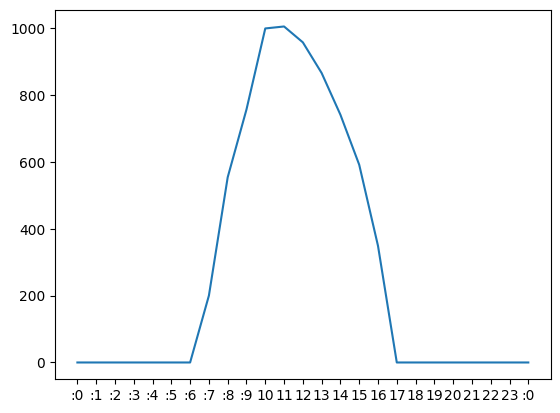

In [73]:
dados = select_dia('2022/4/24:0', '2022/4/25:0')

plt.plot(dados)
plt.xticks(range(len(dados.index)), [i[-2]+i[-1] for i in dados.index])
clear_output()
plt.show()